In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pandas_ta as ta

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

dfs = []

for dirname, _, filenames in os.walk("data/aapl-options-data-2016-2023"):
    for filename in filenames:
        data_path = os.path.join(dirname, filename)
        print(data_path)
        dfs.append(pd.read_csv(data_path, low_memory=False))

# df_raw = pd.read_csv("data/aapl-options-data-2020-2023/aapl_2021_2023.csv")
df_raw = pd.concat(dfs)
columns = df_raw.columns
columns = [s.replace("[", "") for s in columns]
columns = [s.replace("]", "") for s in columns]
columns = [s.replace(" ", "") for s in columns]
df_raw.columns = columns
df_raw

data/aapl-options-data-2016-2023/aapl_2016_2020.csv
data/aapl-options-data-2016-2023/aapl_2021_2023.csv


,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_SIZE,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_SIZE,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT
0,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.00,0.908860,0.000190,0.017090,-0.100400,0.000740,3.253140,13.000000,57.200000,139 x 91,57.700000,58.100000,100.0,0.000000,0.020000,0 x 300,0.010000,-0.000340,0.000110,0.000790,-0.005090,-0.000410,1.625550,0.000000,57.9,0.367
1,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.00,1.000000,0.000000,0.000000,0.000000,0.000000,,,0.000000,150 x 100,52.500000,52.960000,105.0,0.000000,0.010000,0 x 300,0.010000,-0.000690,0.000100,0.000390,-0.005180,-0.000100,1.461900,200.000000,52.9,0.335
2,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.00,1.000000,0.000000,0.000000,0.000000,0.000000,,,0.000000,146 x 94,47.450000,47.790000,110.0,0.000000,0.010000,0 x 412,0.040000,-0.000660,0.000200,0.000000,-0.004250,-0.000090,1.305490,706.000000,47.9,0.303
3,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.00,1.000000,0.000000,0.000000,0.000000,0.000000,,6.000000,36.590000,31 x 100,40.700000,44.640000,115.0,0.000000,0.010000,0 x 397,0.010000,-0.001200,0.000210,0.000890,-0.004340,-0.000050,1.155130,0.000000,42.9,0.272
4,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.00,1.000000,0.000000,0.000000,0.000000,0.000000,,2.000000,35.450000,21 x 21,35.710000,39.610000,120.0,0.000000,0.010000,0 x 457,0.010000,-0.001090,0.000240,0.000450,-0.004290,-0.000200,1.010620,0.000000,37.9,0.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548158,1664568000,2022-09-30 16:00,2022-09-30,16.0,138.09,2025-01-17,1737147600,840.04,0.14059,0.00348,0.46816,-0.00976,0.36018,0.303290,1.000000,4.400000,41 x 3,3.450000,4.100000,270.0,130.550000,132.900000,40 x 47,112.200000,-1.0,0.0,0.0,0.0,0.0,,0.000000,131.9,0.955
548159,1664568000,2022-09-30 16:00,2022-09-30,16.0,138.09,2025-01-17,1737147600,840.04,0.12515,0.00325,0.43074,-0.00904,0.32126,0.304060,0.000000,4.310000,54 x 182,2.910000,3.650000,280.0,140.500000,142.900000,40 x 46,122.000000,-1.0,0.0,0.0,0.0,0.0,,0.000000,141.9,1.028
548160,1664568000,2022-09-30 16:00,2022-09-30,16.0,138.09,2025-01-17,1737147600,840.04,0.10893,0.00298,0.39176,-0.00759,0.28245,0.303170,0.000000,3.750000,124 x 135,2.450000,3.150000,290.0,150.150000,152.950000,40 x 45,132.240000,-1.0,0.0,0.0,0.0,0.0,,0.000000,151.9,1.100
548161,1664568000,2022-09-30 16:00,2022-09-30,16.0,138.09,2025-01-17,1737147600,840.04,0.09147,0.0026,0.34565,-0.00654,0.24037,0.299260,33.000000,2.300000,91 x 5,2.060000,2.450000,300.0,160.000000,162.950000,10 x 54,149.280000,-1.0,0.0,0.0,0.0,0.0,,0.000000,161.9,1.173


In [2]:
# df_raw.info()

In [3]:
date_columns = ["QUOTE_READTIME", "QUOTE_DATE", "EXPIRE_DATE"]
numeric_cols = df_raw.columns.to_list()
numeric_cols.remove("QUOTE_READTIME")
numeric_cols.remove("QUOTE_DATE")
numeric_cols.remove("EXPIRE_DATE")

df_numeric = df_raw.drop(columns=date_columns)

for i in numeric_cols:
    df_numeric[i] = pd.to_numeric(df_numeric[i], errors="coerce")

df_final = df_numeric.drop(columns=["C_SIZE", "P_SIZE"])
# df_final = df_final.drop(columns=date_columns)
# df_final.info()

In [4]:
# df_final.hist(column="DTE", bins=100)

### As we can see, there is a heavy skew towards shorter contracts in this dataset. 

In order to use this data for a viable trading strategy, we may want to consider truncating some longer duration contracts. The strategy proposed by https://tastytrade.com/, an options trading brokerage, recommends staying in the 45-60 day range when using the majority of trading strategies. We will explore the statistical backing behind this recommendation.

P.S. - I have no affiliation with TastyTrade, just a fan of their work and free learning materials!

In [5]:
# pd.DataFrame(df_final.DTE.value_counts()).head(20)
# df_final

Text(0.5, 1.0, 'AAPL Stock Price - 2021 to 2023')

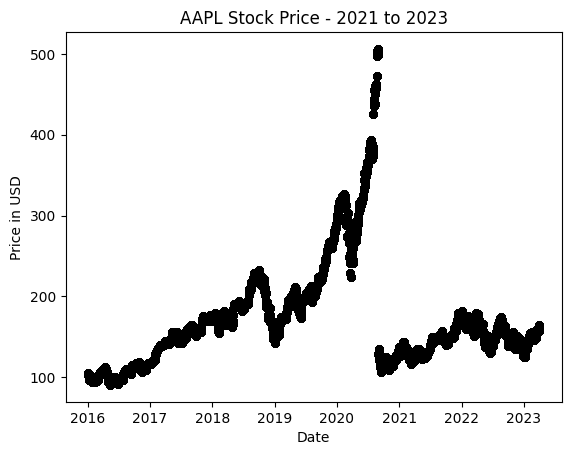

In [6]:
plt.scatter(
    pd.to_datetime(df_numeric["QUOTE_UNIXTIME"], unit="s"), df_numeric["UNDERLYING_LAST"], color="black", alpha=0.003
)
plt.ylabel("Price in USD")
plt.xlabel("Date")
plt.title("AAPL Stock Price - 2021 to 2023")

In [8]:
df_option_history = df_final.copy()

df_option_history["EXPIRE_UNIX"] = pd.to_datetime(df_option_history.EXPIRE_UNIX, unit="s", utc=True)
df_option_history["QUOTE_UNIXTIME"] = pd.to_datetime(df_option_history.QUOTE_UNIXTIME, unit="s", utc=True).apply(
    lambda x: pd.Timestamp(x).round(freq="D")
)

df_option_history.set_index(pd.DatetimeIndex(df_option_history.QUOTE_UNIXTIME), inplace=True)
df_option_history.sort_index(inplace=True)
df_option_history.drop(columns=["QUOTE_UNIXTIME"], inplace=True)

df_option_history["OPTION_ID"] = df_option_history["EXPIRE_UNIX"].astype(str) + df_option_history["STRIKE"].astype(str)
df_option_history["OPTION_ID"] = df_option_history["OPTION_ID"].apply(lambda x: hash(x))


def get_df_cnn_fear_greed_index():
    print("Retrieving historical ETF fear and greed index")
    import json

    with open("cnn_fear_greed_index_data.json") as f:
        cnn_fear_greed_index_data = json.load(f)

    df_fear_greed_index = pd.DataFrame(
        data=cnn_fear_greed_index_data["data"]["c:50108"]["series"][0], columns=["x", "y"]
    )
    df_fear_greed_index.set_index(
        pd.DatetimeIndex([pd.Timestamp(x, unit="s", tz="UTC") for x in df_fear_greed_index.x]),
        inplace=True,
    )
    df_fear_greed_index.rename(columns={"y": "fear_greed_index"}, inplace=True)
    return df_fear_greed_index


df_fear_greed_index = get_df_cnn_fear_greed_index()
df_option_history = df_option_history.join(df_fear_greed_index[["fear_greed_index"]], how="inner")
df_option_history["fear_greed_index"] = df_option_history.fear_greed_index.fillna(method="ffill").astype(float)

df_history = df_option_history.groupby(df_option_history.index).first()[["UNDERLYING_LAST", "fear_greed_index"]]
# df_history = df_option_history.groupby(df_option_history.index).first()[["UNDERLYING_LAST"]]
df_history.rename(columns={"UNDERLYING_LAST": "close"}, inplace=True)

CustomStrategy = ta.Strategy(
    name="RSI",
    ta=[
        {"kind": "rsi", "length": 14},
    ],
)
df_history.ta.strategy(CustomStrategy)

for column in ["close", "fear_greed_index", "RSI_14"]:
    for days in [14]:
        periods = days
        df_history[f"{column}_min_{days}"] = df_history[column].rolling(window=periods, min_periods=periods).min()
        df_history[f"{column}_max_{days}"] = df_history[column].rolling(window=periods, min_periods=periods).max()

# df_option_history = df_option_history.join(df_history, how="inner")
df_option_history = df_option_history.join(df_history.drop(columns=["fear_greed_index"]), how="inner")

df_option_history

Retrieving historical ETF fear and greed index


/tmp/ipykernel_72504/2040824419.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_option_history["fear_greed_index"] = df_option_history.fear_greed_index.fillna(method="ffill").astype(float)


,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,OPTION_ID,fear_greed_index,close,RSI_14,close_min_14,close_max_14,fear_greed_index_min_14,fear_greed_index_max_14,RSI_14_min_14,RSI_14_max_14
2021-05-18 00:00:00+00:00,16.0,126.27,2021-11-19 21:00:00+00:00,186.04,0.06024,0.00413,0.10797,-0.00902,-16.85110,0.32023,101.0,0.66,0.66,0.71,185.0,59.29,59.45,0.00,-0.86364,0.00190,0.16925,-0.01694,-0.35916,0.36581,NaN,58.7,0.465,5633432264383574174,34.8333,126.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-18 00:00:00+00:00,16.0,126.27,2021-11-19 21:00:00+00:00,186.04,0.07030,0.00473,0.12161,-0.01054,-18.05296,0.31256,1.0,0.79,0.79,0.83,180.0,54.41,54.55,0.00,-0.86561,0.00250,0.16970,-0.01591,-0.37174,0.34505,NaN,53.7,0.426,-907891023959081048,34.8333,126.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-18 00:00:00+00:00,16.0,126.27,2021-11-19 21:00:00+00:00,186.04,0.08352,0.00556,0.13906,-0.01115,-19.70419,0.30577,6.0,0.94,0.94,1.00,175.0,49.55,49.75,0.00,-0.86513,0.00339,0.17529,-0.01589,-0.39277,0.32912,NaN,48.7,0.386,-4507790798385525190,34.8333,126.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-18 00:00:00+00:00,16.0,126.27,2021-11-19 21:00:00+00:00,186.04,0.10055,0.00646,0.15956,-0.01324,0.05919,0.29969,52.0,1.14,1.16,1.22,170.0,44.80,44.94,0.00,-0.85979,0.00452,0.18473,-0.01575,-0.41828,0.31523,NaN,43.7,0.346,2538948158052797381,34.8333,126.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-18 00:00:00+00:00,16.0,126.27,2021-11-19 21:00:00+00:00,186.04,0.12280,0.00767,0.18371,-0.01455,0.07126,0.29455,1.0,1.46,1.45,1.49,165.0,40.10,40.24,0.00,-0.84860,0.00591,0.19940,-0.01592,-0.44444,0.30441,NaN,38.7,0.307,-1677381912772642873,34.8333,126.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-01 00:00:00+00:00,16.0,164.84,2023-05-12 20:00:00+00:00,42.00,0.89560,0.00748,0.09967,-0.05238,0.14122,0.41894,NaN,0.00,25.25,29.20,139.0,0.69,0.73,0.00,-0.07402,0.00683,0.07931,-0.03230,-0.01449,0.36440,NaN,25.8,0.157,-3658876167344946616,59.1714,164.84,69.674829,152.49,164.84,22.6857,59.1714,56.598125,69.674829
2023-04-01 00:00:00+00:00,16.0,164.84,2023-05-12 20:00:00+00:00,42.00,0.90114,0.00710,0.09594,-0.05085,0.14062,0.42698,NaN,0.00,26.20,30.15,138.0,0.63,0.67,0.00,-0.06752,0.00628,0.07412,-0.03116,-0.01341,0.36771,NaN,26.8,0.163,6198960997735233865,59.1714,164.84,69.674829,152.49,164.84,22.6857,59.1714,56.598125,69.674829
2023-04-01 00:00:00+00:00,16.0,164.84,2023-05-12 20:00:00+00:00,42.00,0.90573,0.00667,0.09277,-0.05040,0.14083,0.43500,NaN,0.00,27.15,31.10,137.0,0.59,0.62,0.63,-0.06318,0.00590,0.07023,-0.02933,-0.01254,0.37365,3.0,27.8,0.169,-1030637386536766087,59.1714,164.84,69.674829,152.49,164.84,22.6857,59.1714,56.598125,69.674829
2023-04-01 00:00:00+00:00,16.0,164.84,2023-05-12 20:00:00+00:00,42.00,0.91391,0.00598,0.08631,-0.04830,0.14000,0.45052,1.0,29.10,29.05,33.00,135.0,0.50,0.54,0.56,-0.05376,0.00508,0.06232,-0.02720,-0.01141,0.38290,360.0,29.8,0.181,4849730605881705635,59.1714,164.84,69.674829,152.49,164.84,22.6857,59.1714,56.598125,69.674829


In [9]:
df_option_history.describe()

,QUOTE_TIME_HOURS,UNDERLYING_LAST,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,OPTION_ID,fear_greed_index,close,RSI_14,close_min_14,close_max_14,fear_greed_index_min_14,fear_greed_index_max_14,RSI_14_min_14,RSI_14_max_14
count,396011.0,396011.000000,396011.000000,396011.000000,396011.000000,396011.000000,396011.000000,396011.000000,376145.000000,358545.000000,395822.000000,395822.000000,395822.000000,396011.000000,395822.000000,395822.000000,395822.000000,396011.000000,396011.000000,396011.000000,396011.000000,396011.000000,358990.000000,337178.000000,396011.000000,396011.000000,3.960110e+05,396011.000000,396011.000000,382109.000000,383069.000000,383069.000000,383069.000000,383069.000000,370285.000000,370285.000000
mean,16.0,150.906325,199.591099,0.545574,0.006990,0.016688,-0.027801,0.441490,0.456310,236.225799,25.841064,28.320604,28.827553,151.560020,27.956077,28.502690,18.529701,-0.443856,0.007059,-0.209919,-0.028387,-0.257883,0.522519,221.226655,51.049172,0.339631,-2.495912e+17,42.510055,150.906325,53.396784,143.881235,158.032198,29.395252,55.707319,42.980366,62.583515
std,0.0,13.205212,228.257298,0.397669,0.015343,12.336362,0.042924,7.041576,0.541275,2024.558446,32.688680,33.267310,33.612575,62.900209,38.420130,38.910447,31.960633,0.390231,0.015060,14.262772,0.058969,0.590585,0.481401,1518.932550,37.607843,0.253068,5.245192e+18,17.545469,13.205212,12.066711,11.426140,12.762593,16.041122,15.065793,10.215151,10.670676
min,16.0,123.540000,0.000000,0.000120,-0.000130,-1430.999650,-2.500710,-858.745620,-0.000500,0.000000,0.000000,0.000000,0.000000,18.750000,0.000000,0.000000,0.000000,-1.000000,-0.000180,-1208.699930,-2.942630,-24.851360,-0.000500,0.000000,0.000000,0.000000,-9.219686e+18,4.028600,123.540000,29.214545,123.540000,127.220000,4.028600,22.400000,29.214545,38.980162
25%,16.0,142.800000,25.000000,0.084800,0.000620,0.013020,-0.032050,0.010280,0.293220,0.000000,0.340000,0.840000,0.980000,105.000000,0.540000,0.630000,0.080000,-0.862390,0.000490,0.014160,-0.031160,-0.274300,0.307740,0.000000,18.800000,0.125000,-4.878971e+18,28.016100,142.800000,43.194006,136.880000,149.560000,17.828600,43.800000,33.717162,53.690199
50%,16.0,149.570000,107.040000,0.648190,0.003210,0.089340,-0.016140,0.088320,0.344100,4.000000,10.100000,13.540000,14.000000,145.000000,7.300000,7.650000,2.410000,-0.355670,0.003060,0.094220,-0.014400,-0.045780,0.388140,3.000000,44.500000,0.294000,-3.839032e+17,40.628600,149.570000,53.189723,142.570000,155.350000,22.700000,57.114300,40.128656,62.030654
75%,16.0,159.310000,304.000000,0.942850,0.007840,0.281885,-0.005680,0.425705,0.455090,48.000000,43.100000,48.550000,49.400000,195.000000,44.750000,45.700000,22.490000,-0.038480,0.008620,0.256420,-0.004950,-0.002160,0.553177,51.000000,77.500000,0.512000,3.964022e+18,58.257100,159.310000,62.542400,150.640000,167.460000,39.542900,68.028600,51.232351,69.667982
max,16.0,181.960000,1059.000000,1.000000,2.340810,30.280530,0.000000,136.300420,40.900770,183723.000000,155.400000,156.700000,157.100000,320.000000,193.000000,196.950000,193.100000,0.000000,2.823530,24.161080,0.000000,0.000000,13.287910,107605.000000,195.000000,1.560000,9.221044e+18,82.171400,181.960000,83.579921,172.000000,181.960000,69.485700,82.171400,69.235825,83.579921


In [10]:
money = 1000
start_money = money
owned_options = []
last_index = df_option_history.index.values[-1]

for index, row in df_option_history.iterrows():
    index_date = index.strftime(format="%Y-%m-%d")
    is_last_index = index.to_numpy() == last_index

    max_buy_price = money / 10
    call_ask_price = row.C_ASK * 100
    call_bid_price = row.C_BID * 100
    put_ask_price = row.P_ASK * 100
    put_bid_price = row.P_BID * 100

    owned_options_not_sold = []

    good_call_buy = row.fear_greed_index == row.fear_greed_index_max_14
    good_put_buy = row.fear_greed_index == row.fear_greed_index_min_14

    for option in owned_options:
        if option["OPTION_ID"] == row.OPTION_ID:
            if option["side"] == "call" and (
                (option["DTE"] - row.DTE) > 7
                or row.DTE < 7
                # or option["C_ASK"] < row.C_BID
                or not good_call_buy
                or is_last_index
            ):
                money += call_bid_price
                print(f"{index_date} ${money:.2f} {len(owned_options)} sell call {row.OPTION_ID} ${call_bid_price:.2f}")
            elif option["side"] == "put" and (
                (option["DTE"] - row.DTE) > 7
                or row.DTE < 7
                # or option["P_ASK"] < row.P_BID
                or not good_put_buy
                or is_last_index
            ):
                money += put_bid_price
                print(f"{index_date} ${money:.2f} {len(owned_options)} sell put {row.OPTION_ID} ${put_bid_price:.2f}")
            else:
                owned_options_not_sold.append(option)
        else:
            owned_options_not_sold.append(option)

    owned_options = owned_options_not_sold

    if not is_last_index:
        if (
            good_call_buy
            and row.DTE > 14
            # and row.DTE < 30
            and row.C_VOLUME > 10
            and row.STRIKE_DISTANCE_PCT < 0.1
            # and row.STRIKE < row.UNDERLYING_LAST
            # and call_ask_price > 10
            and call_ask_price <= max_buy_price
            and money >= call_ask_price
            and len([x for x in owned_options if x["side"] == "call" and x["purchase_date"] == index_date]) == 0
        ):
            money -= call_ask_price
            option_to_buy = row.to_dict()
            option_to_buy["side"] = "call"
            option_to_buy["purchase_date"] = index_date
            owned_options.append(option_to_buy)
            print(f"{index_date} ${money:.2f} {len(owned_options)} buy call {row.OPTION_ID} ${call_ask_price:.2f}")
        elif (
            good_put_buy
            and row.DTE > 14
            # and row.DTE < 30
            and row.P_VOLUME > 10
            and row.STRIKE_DISTANCE_PCT < 0.1
            # and row.STRIKE > row.UNDERLYING_LAST
            # and put_ask_price > 10
            and put_ask_price <= max_buy_price
            and money >= put_ask_price
            and len([x for x in owned_options if x["side"] == "put" and x["purchase_date"] == index_date]) == 0
        ):
            money -= put_ask_price
            option_to_buy = row.to_dict()
            option_to_buy["side"] = "put"
            option_to_buy["purchase_date"] = index_date
            owned_options.append(option_to_buy)
            print(f"{index_date} ${money:.2f} {len(owned_options)} buy put {row.OPTION_ID} ${put_ask_price:.2f}")

print(f"Start money: ${start_money:.2f}")
print(f"End money: ${money:.2f} ({(money-start_money)/start_money*100:.2f}%)")

2021-06-10 $932.00 1 buy call -4710830167397641494 $68.00
2021-06-11 $856.00 2 buy call 1443773502913702610 $76.00
2021-06-15 $960.00 2 sell call -4710830167397641494 $104.00
2021-06-15 $1109.00 1 sell call 1443773502913702610 $149.00
2021-07-08 $1083.00 1 buy put -5386221322268103231 $26.00
2021-07-09 $1117.00 1 sell put -5386221322268103231 $34.00
2021-07-15 $1075.00 1 buy put -2396054251671692902 $42.00
2021-07-16 $1035.00 2 buy put -7040916274832926161 $40.00
2021-07-20 $959.00 3 buy put 2354788532144327639 $76.00
2021-07-21 $999.00 3 sell put 2354788532144327639 $40.00
2021-07-21 $1045.00 2 sell put -7040916274832926161 $46.00
2021-07-21 $1101.00 1 sell put -2396054251671692902 $56.00
2021-08-05 $1080.00 1 buy call -4057476745543569725 $21.00
2021-08-06 $977.00 2 buy call -6678263302712638278 $103.00
2021-08-10 $960.00 3 buy call 5468687197315531096 $17.00
2021-08-11 $890.00 4 buy call 6461101591841498299 $70.00
2021-08-12 $851.00 5 buy call -987396693408926110 $39.00
2021-08-13 $